
# <center>Estudio churn</center>
# <center>con distintos algoritmos de clasificación</center>

<a name="id8"></a>
**Índice**   
1. [KNN](#id1)
2. [Arbol de decisión](#id2)
3. [SVM](#id3)
4. [Regresión Logística](#id4)
5. [Random Forest](#id5)
6. [XGBoost](#id6)
7. [RESUMEN FINAL](#id7)

Carguemos las librerías necesarias

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor, XGBClassifier

from sklearn.model_selection import train_test_split,ParameterGrid
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import itertools

### Acerca del set de datos
Utilizaremos datos de las telecomunicaciones para poder predecir el cliente churn. Estos son datos históricos de clientes donde cada fila representa un cliente. Los datos son fáciles de comprender, y podrás descubrir conclusiones que puedes usar de inmediato. Generalmente, es menos caro mantener clientes que conseguir nuevos, así que el foco de este análisis es predecir los clientes que se quedarían en la compañía. 


Estos datos proveen información que ayudarán a predecir comportamientos que retendrán a los clientes. Puedes analizar toda la información relevante del cliente y desarrollar programas de retención centrados en los clientes.



Los datos incluyen información acerca de:

- Clientes que se fueron el último mes – la columna se llama Churn
- Los servicios que cada cliente ha contratado – teléfono, líneas múltiples, internet, seguridad online, resguardo online, protección de dispositivos, soporte técnico y streaming de TV y películas
- Información de la cuenta del cliente - cuánto hace que es cliente, contrato, método de pago, facturación digital, cargos mensuales y cargos totales
- Información demográfica de los clientes – sexo, rango de edad y si tienen pareja y dependientes


### Cargar Datos a partir de un archivo CSV (Valores Delimitados por Coma)  

In [2]:
df = pd.read_csv('~/Desktop/MLandPython/dataset archive/ChurnData.csv', delimiter=",")
print(df.shape)
df[0:5]

(200, 28)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


# Visualización de Datos y Análisis 



#### Veamos cuántos de cada clase están en nuestro set de datos 

In [3]:
# Variables categoricas
# Esto saca cuantos valores hay por cada categoria de una variable categorica/columna
# print(df['Clump'].value_counts(), df['UnifSize'].value_counts(),df['UnifShape'].value_counts())
# Otra forma de verlo es con histogramas, abajo

Puedes explorar fácilmente tus datos utilizando técnicas de visualización:

/Users/robertosanzgarcia/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'address'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'ed'}>],
       [<AxesSubplot:title={'center':'employ'}>,
        <AxesSubplot:title={'center':'equip'}>,
        <AxesSubplot:title={'center':'callcard'}>,
        <AxesSubplot:title={'center':'wireless'}>,
        <AxesSubplot:title={'center':'longmon'}>],
       [<AxesSubplot:title={'center':'tollmon'}>,
        <AxesSubplot:title={'center':'equipmon'}>,
        <AxesSubplot:title={'center':'cardmon'}>,
        <AxesSubplot:title={'center':'wiremon'}>,
        <AxesSubplot:title={'center':'longten'}>],
       [<AxesSubplot:title={'center':'tollten'}>,
        <AxesSubplot:title={'center':'cardten'}>,
        <AxesSubplot:title={'center':'voice'}>,
        <AxesSubplot:title={'center':'pager'}>,
        <AxesSubplot:title={'center':'internet'}>],
       [<A

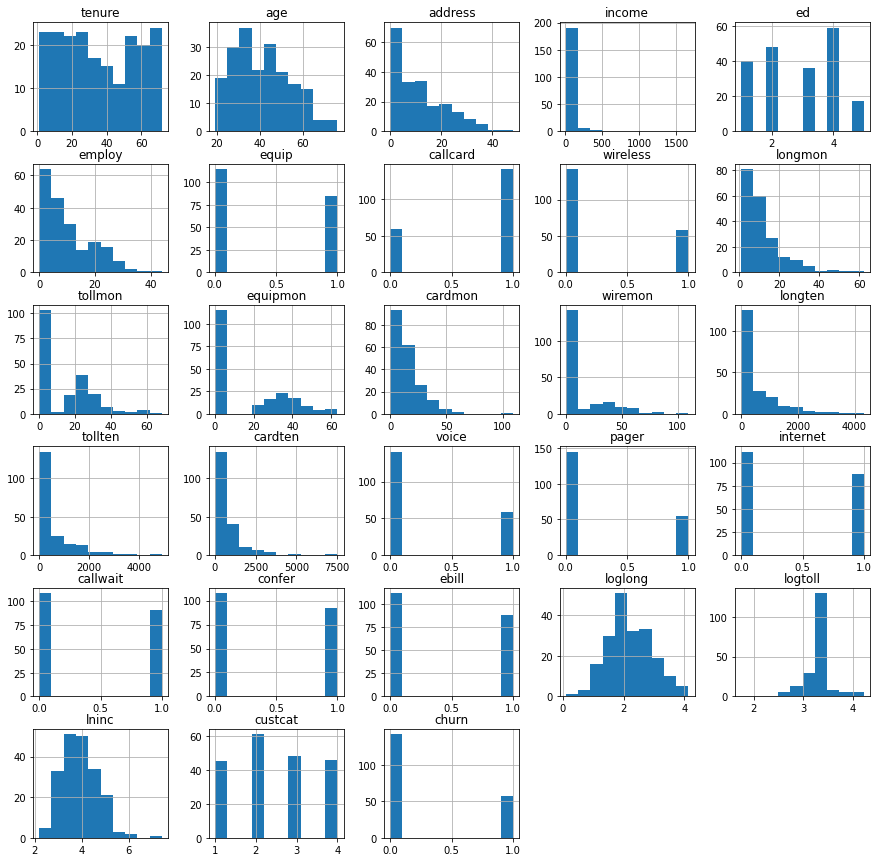

In [4]:
# Variables numericas y categoricas

# Esto imprime todos los histogramas de las columnas a la vez, con el parámetro figsize he controlado el tamaño
df.hist(figsize=(15, 15))


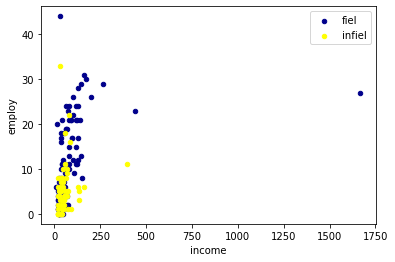

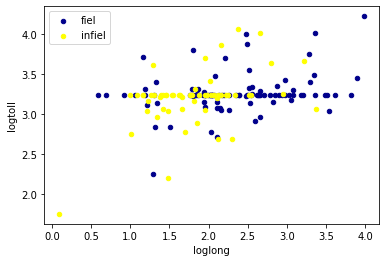

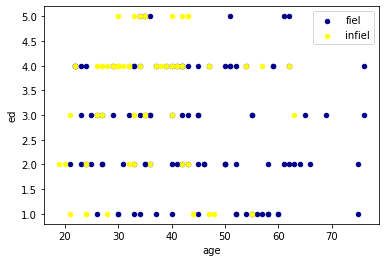

In [5]:
# También puedo ver cada variable indep (de 2 en 2) con respecto a la ver dep o target
# Se ve que están mezclados aunque también separados

ax = df[df['churn'] == 0][0:100].plot(kind='scatter', x='income', y='employ', color='DarkBlue', label='fiel');
df[df['churn'] == 1][0:100].plot(kind='scatter', x='income', y='employ', color='Yellow', label='infiel', ax=ax);
plt.show()
ax = df[df['churn'] == 0][0:100].plot(kind='scatter', x='loglong', y='logtoll', color='DarkBlue', label='fiel');
df[df['churn'] == 1][0:100].plot(kind='scatter', x='loglong', y='logtoll', color='Yellow', label='infiel', ax=ax);
plt.show()
ax = df[df['churn'] == 0][0:100].plot(kind='scatter', x='age', y='ed', color='DarkBlue', label='fiel');
df[df['churn'] == 1][0:100].plot(kind='scatter', x='age', y='ed', color='Yellow', label='infiel', ax=ax);
plt.show()

# Pre-procesamiento

Utilizando <b>my_data</b> como los datos de panda el archivo Drug.csv, declara las siguientes variables: <br>
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (datos de my_data) </li>
    <li> <b> y </b> como el <b> vector de respuesta </b> (target) </li>
  
</ul>

Elimina la columna que contiene el target ya que no posee valores numéricos.

Como te puedes imaginar, algunas características son de categoría, tales como __Sex__ o __BP__. Desafortunadamente, los árboles de Decisión Sklearn no manejan variables categóricas. Pero las podemos convertir en valores numéricos. __pandas.get_dummies()__
Convertir variable categórica en indicadores de variables.

In [6]:
# Miramos primero el tipo de dato de las columnas
df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

In [7]:
# #Parece que la columna BareNuc incluye algunos valores que no son numéricos. Podemos eliminar esas filas:
# df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
# df['BareNuc'] = df['BareNuc'].astype('int')
# df.dtypes

In [8]:
#vars_dep = df.drop('churn',1).columns
vars_dep = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']

# #all
# vars_dep = ['tenure','age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard','wireless',
#             'longmon','tollmon', 'equipmon', 'cardmon', 'wiremon','longten','tollten', 'cardten','voice',
#             'pager', 'internet','callwait','confer', 'ebill','loglong','logtoll', 'lninc', 'custcat']

# # Quitando las features que suben test sin bajar train
# vars_dep = ['tenure','age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard',
#             'tollmon', 'equipmon', 'cardmon', 'wiremon','tollten', 'cardten','voice',
#             'pager', 'internet','callwait','confer', 'ebill','loglong', 'lninc', 'custcat']


X = np.asarray(df[vars_dep])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

Ahora, podemos completar la variable objetivo (target).

In [9]:
y_label = df.columns[-1]
y = df[y_label]
y[0:5]

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: churn, dtype: float64

## Normalizar los Datos 

La estandarización de Datos brinda a los datos cero media y varianza de unidad, es buena práctica, especialmente para algoritmos tales como KNN el cual se basa en distancia de casos:

In [10]:
# #Elijo si normalizo o no los datos según el algoritmo de clasificación
# X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
# X[0:5]

## Train Test Split  
Al margen de la exactitud de la muestra, está el porcentaje de las predicciones correctas que el modelo hace de los datos para el que no ha sido entrenado. Al hacer un entrenamiento y prueba en el mismo set de datos, de seguro tendrán baja exactitud de muestra debido a la probabilidad de estar sobre dimensionado.

Es importante que nuestros modelos tengan una exactitud de muestra alta porque el propósito de cualquier modelos es lograr predicciones lo más certeras posibles sobre datos no conocidos. Entonces, ¿cómo podemos mejorar la precisión? Una forma es utilizar un enfoque de evaluación llamado Train/Test Split (Entrenar/Evaluar Dividir).
Esta forma requiere dividir el set de datos en conjuntos de entrenamiento y prueba, los cuales son mutuamente exclusivos. Luego de ello, se entrena con el conjunto de entrenamiento y se prueba con el conjunto de prueba.

Este método brinda una evaluación más precisa porque el set de prueba no es parte del conjunto de datos que ha sido utilizado para entrenar los datos. Es más realista para los problemas actuales.


In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=8)
print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)


Set de Entrenamiento: (160, 7) (160,)
Set de Prueba: (40, 7) (40,)


# Clasificación 

<a name="id1"></a>
## K-vecinos más cercano (K-NN)

### Directamente optimizo hiperparámetros


Podemos calcular la certeza de KNN para diferentes Ks.

In [12]:
Ks = 20
mean_acc = np.zeros((Ks-3))
std_acc = np.zeros((Ks-3))

for n in range(3,Ks-2):
    
    #Entrenar el Modelo y Predecir  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


#### Dibujo de la certeza del modelo para diferentes números de vecinos

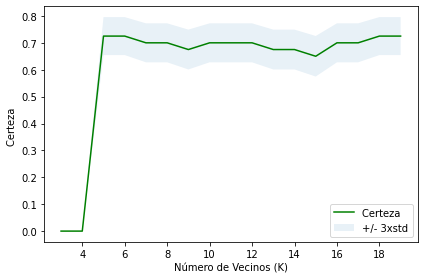

In [13]:
plt.plot(range(3,Ks),mean_acc,'g')
plt.fill_between(range(3,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Certeza ', '+/- 3xstd'))
plt.ylabel('Certeza ')
plt.xlabel('Número de Vecinos (K)')
plt.tight_layout()
plt.show()

In [14]:
print( "La mejor aproximación de certeza fue con ", mean_acc.max(), "con k=", mean_acc.argmax()+1)

La mejor aproximación de certeza fue con  0.725 con k= 3


### Creo, entreno y evalúo el modelo con los mejores hiperparámetros

In [15]:
#Me quedo con el modelo mejor y lo entreno con X e Y train
knn_model = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1)
knn_model.fit(X_train,y_train)

#Hago predicción con X test y lo comparo con y test
ypred = knn_model.predict(X_train)
yhat = knn_model.predict(X_test)
  
#print('Parametros del mejor arbol: ',resultados.at[0,'criterion'],resultados.at[0,'max_depth'],resultados.at[0,'max_features'])    
knn_acc_train = accuracy_score(y_train, ypred)
knn_acc_test = accuracy_score(y_test, yhat)

print("Precisión de entrenamiento: ", knn_acc_train)
print("Precisión de test: ", knn_acc_test)
knn_model


Precisión de entrenamiento:  0.825
Precisión de test:  0.725


KNeighborsClassifier(n_neighbors=3)

In [16]:
print(confusion_matrix(y_test, yhat, labels=sorted(df[y_label].unique())))
print (classification_report(y_test, yhat))

[[25  4]
 [ 7  4]]
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82        29
         1.0       0.50      0.36      0.42        11

    accuracy                           0.73        40
   macro avg       0.64      0.61      0.62        40
weighted avg       0.70      0.72      0.71        40



<a name="id2"></a>
## Arbol de decisión

### Directamente optimizo hiperparámetros

In [17]:
## Optimizo los hiperparámetros
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'max_features': [3, 4, 4],
                 'max_depth'   : [3, 5, 10],
                 'criterion'   : [ 'entropy','gini']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'accuracy': []}

for params in param_grid:
    
    modelo = DecisionTreeClassifier(        
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    yhat= modelo.predict(X_test)
    
    resultados['params'].append(params)
    resultados['accuracy'].append(accuracy_score(y_test,yhat))
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(7)

Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 3} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 4} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 4} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 3} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 4} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 4} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 3} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 4} ✓
Modelo: {'criterion': 'gini', 'm

,accuracy,criterion,max_depth,max_features
0,0.850,entropy,3,3
9,0.850,gini,3,3
4,0.825,entropy,5,4
5,0.825,entropy,5,4
6,0.725,entropy,10,3
15,0.725,gini,10,3
16,0.725,gini,10,4


### Creo, entreno y evalúo el modelo con los mejores hiperparámetros

In [18]:
#Creo el modelo y lo entreno con X e Y train
resultados = resultados.reset_index(drop=True)
dt_model = DecisionTreeClassifier(criterion=resultados.at[0,'criterion'],
                                  max_depth = resultados.at[0,'max_depth'],
                                  max_features = resultados.at[0,'max_features'])
dt_model.fit(X_train,y_train)

#Hago predicción con X test y lo comparo con y test
ypred = dt_model.predict(X_train)
yhat2 = dt_model.predict(X_test)
 
#print('Parametros del mejor arbol: ',resultados.at[0,'criterion'],resultados.at[0,'max_depth'],resultados.at[0,'max_features'])    
dt_acc_train = accuracy_score(y_train, ypred)
dt_acc_test = accuracy_score(y_test, yhat2)

print("Precisión de entrenamiento: ", dt_acc_train)
print("Precisión de test: ", dt_acc_test)
dt_model

Precisión de entrenamiento:  0.775
Precisión de test:  0.75


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=3)

In [19]:
print(confusion_matrix(y_test, yhat2, labels=sorted(df[y_label].unique())))
print (classification_report(y_test, yhat2))

[[24  5]
 [ 5  6]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        29
         1.0       0.55      0.55      0.55        11

    accuracy                           0.75        40
   macro avg       0.69      0.69      0.69        40
weighted avg       0.75      0.75      0.75        40



In [20]:
importancia_predictores = pd.DataFrame(
                            {'predictor': vars_dep,
                             'importancia': dt_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,income,0.337045
0,tenure,0.282172
5,employ,0.169766
6,equip,0.154580
1,age,0.056437
2,address,0.000000
4,ed,0.000000


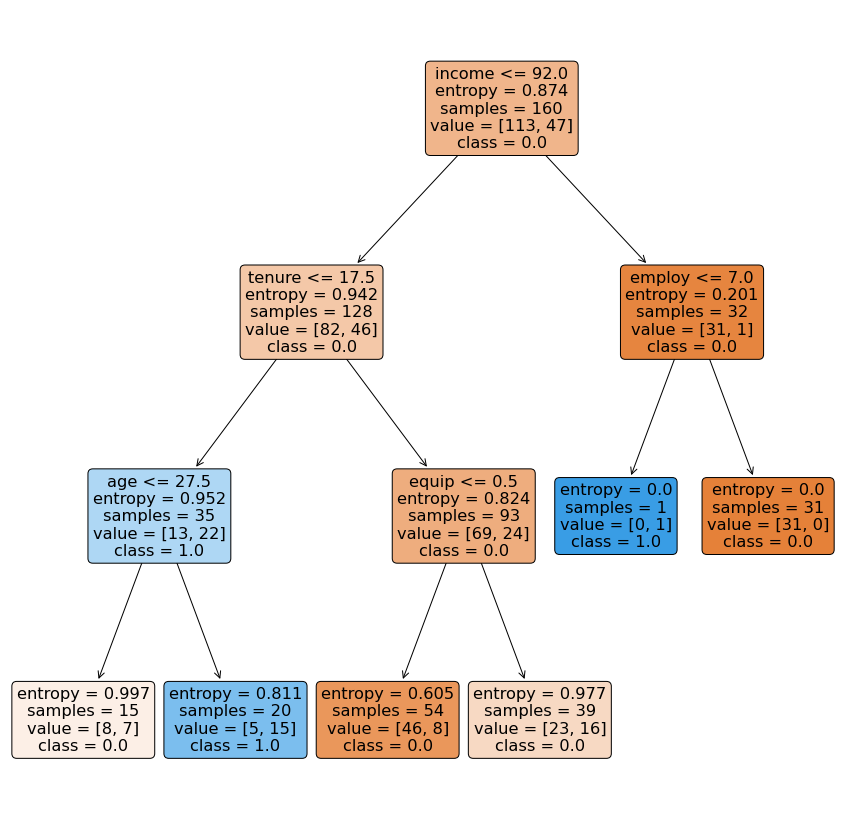

In [21]:
#Preparo las etiquetas del arbol
featureNames = vars_dep
targetNames = sorted(df[y_label].unique().astype('str'))

#Esto Genera bien el fichero .dot
# arbol_dot = tree.export_graphviz(drugTree, out_file='drugtree.dot',
#                                  feature_names=featureNames, class_names=targetNames ,
#                                  filled=True, special_characters=True)  

#Esto pinta bien el arbol, hay que poner antes el tamaño de la figura, sino lo hace muy pequeño
plt.figure(figsize=(15, 15))
plot_tree(dt_model, feature_names=featureNames, class_names=targetNames, filled=True, rounded=True,)
plt.show()

<a name="id3"></a>
## SVM Support Vector Machines 

### Directamente optimizo hiperparámetros

In [22]:
# Itero con los 4 posibles kernel de SVM para ver cual es el mejor
kernel_params=['linear','poly','rbf','sigmoid']
acc_svm = pd.DataFrame(index=kernel_params)

for i in kernel_params:
    svm_model = svm.SVC(kernel=i)
    svm_model.fit(X_train, y_train)
    yhat3 = svm_model.predict(X_test)
    acc_svm.at[i,'accuracy'] = accuracy_score(y_test, yhat3)

# Extraigo el mejor
mejor_kernel = acc_svm[acc_svm['accuracy']==acc_svm['accuracy'].max()].index
mejor_kernel = np.array(mejor_kernel).astype('str')
print('El mejor kernel es ', mejor_kernel[0],'con una precisión de: ',acc_svm['accuracy'].max())
acc_svm  

El mejor kernel es  linear con una precisión de:  0.75


,accuracy
linear,0.750
poly,0.725
rbf,0.725
sigmoid,0.675


### Creo, entreno y evalúo el modelo con los mejores hiperparámetros

In [23]:
# Construyo el modelo final con ese Kernel
svm_model = svm.SVC(kernel=mejor_kernel[0])
svm_model.fit(X_train,y_train)


#Hago predicción con X train y test
ypred = svm_model.predict(X_train)
yhat3 = svm_model.predict(X_test)

svm_acc_train = accuracy_score(y_train, ypred)
svm_acc_test = accuracy_score(y_test, yhat3)

print("Precisión de entrenamiento: ", svm_acc_train)
print("Precisión de test: ", svm_acc_test)

svm_model

Precisión de entrenamiento:  0.75
Precisión de test:  0.75


SVC(kernel='linear')

In [24]:
print(confusion_matrix(y_test, yhat3, labels=sorted(df[y_label].unique())))
print (classification_report(y_test, yhat3))

[[26  3]
 [ 7  4]]
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        29
         1.0       0.57      0.36      0.44        11

    accuracy                           0.75        40
   macro avg       0.68      0.63      0.64        40
weighted avg       0.73      0.75      0.73        40



<a name="id4"></a>
## Regresion Logística

### Directamente optimizo hiperparámetros

In [25]:
# Itero con los 5 posibles Solver de Reg Logística para ver cual es el mejor
solver_params=['lbfgs','liblinear','sag','saga','newton-cg']
acc_lr = pd.DataFrame(index=solver_params)

for i in solver_params:
    lr_model = LogisticRegression(C=0.01, solver=i)
    lr_model.fit(X_train, y_train)
    y_hat7 = lr_model.predict(X_test)
    acc_lr.at[i,'accuracy'] = accuracy_score(y_test, y_hat7)

# Extraigo el mejor
mejor_solver = acc_lr[acc_lr['accuracy']==acc_lr['accuracy'].max()].index
mejor_solver = np.array(mejor_solver).astype('str')
print('El mejor kernel es ', mejor_solver[0],'con una precisión de: ',acc_lr['accuracy'].max())
acc_lr  


El mejor kernel es  liblinear con una precisión de:  0.75


/Users/robertosanzgarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/robertosanzgarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,accuracy
lbfgs,0.725
liblinear,0.750
sag,0.725
saga,0.725
newton-cg,0.725


### Creo, entreno y evalúo el modelo con los mejores hiperparámetros

In [26]:
# Construyo el modelo final con ese Solver
lr_model = LogisticRegression(C=0.01,solver=mejor_solver[0])
lr_model.fit(X_train, y_train)

#Hago predicción con X train y test
ypred = lr_model.predict(X_train)
yhat4 = lr_model.predict(X_test)

lr_acc_train = accuracy_score(y_train, ypred)
lr_acc_test = accuracy_score(y_test, yhat4)

print("Precisión de entrenamiento: ", lr_acc_train)
print("Precisión de test: ", lr_acc_test)

lr_model

Precisión de entrenamiento:  0.725
Precisión de test:  0.75


LogisticRegression(C=0.01, solver='liblinear')

In [27]:
print(confusion_matrix(y_test, yhat4, labels=sorted(df[y_label].unique())))
print (classification_report(y_test, yhat4))

[[27  2]
 [ 8  3]]
              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84        29
         1.0       0.60      0.27      0.37        11

    accuracy                           0.75        40
   macro avg       0.69      0.60      0.61        40
weighted avg       0.72      0.75      0.71        40



<a name="id5"></a>
## Random Forest

### Directamente optimizo hiperparámetros

In [28]:

# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'max_features': [3, 4, 7],
                 'max_depth'   : [3, 10,20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                n_estimators= 100,        
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados = resultados.reset_index(drop=True)
resultados.head(4)

Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 3} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 4} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 3} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 4} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 3} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 4} ✓
Modelo: {'criterion': 'entropy', 'max_d

,oob_accuracy,criterion,max_depth,max_features
0,0.71250,gini,10,4
1,0.70625,gini,20,4
2,0.70000,gini,3,3
3,0.70000,gini,20,7


### Creo, entreno y evalúo el modelo con los mejores hiperparámetros

In [29]:
#Creo el modelo y lo entreno con X e Y train
rf_model = RandomForestClassifier(criterion=resultados.at[0,'criterion'],
                                  max_depth = resultados.at[0,'max_depth'],
                                  max_features = resultados.at[0,'max_features'])
#rf_model = DecisionTreeClassifier(criterion="gini", max_depth = 10, max_features = 5,n_estimators= 100,random_state = 123)
rf_model.fit(X_train,y_train)

#Hago predicción con Y test
ypred = rf_model.predict(X_train)
yhat5 = rf_model.predict(X_test)

rf_acc_train = accuracy_score(y_train, ypred)
rf_acc_test = accuracy_score(y_test, yhat5)

print("Precisión de entrenamiento: ", rf_acc_train)
print("Precisión de test: ", rf_acc_test)

rf_model

Precisión de entrenamiento:  1.0
Precisión de test:  0.8


RandomForestClassifier(max_depth=10, max_features=4)

In [30]:
importancia_predictores = pd.DataFrame(
                            {'predictor': vars_dep,
                             'importancia': rf_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,tenure,0.252774
3,income,0.187223
5,employ,0.176805
1,age,0.151431
2,address,0.111311
4,ed,0.078829
6,equip,0.041626


In [31]:
print(confusion_matrix(y_test, yhat5, labels=sorted(df[y_label].unique())))
print (classification_report(y_test, yhat5))

[[25  4]
 [ 4  7]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        29
         1.0       0.64      0.64      0.64        11

    accuracy                           0.80        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.80      0.80      0.80        40



<a name="id6"></a>
## XGBoost

### Directamente optimizo hiperparámetros

In [32]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [100, 500, 1000],
                 'learning_rate': [0.01, 0.05, 0.1],
                 'max_depth'   : [3, 5, 7],
                 'gamma' : [0.1, 0.2]
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'accuracy': []}

for params in param_grid:
    
    xgb_model = XGBClassifier(
                use_label_encoder=False,
                verbosity=0,
                ** params
             )
    
    xgb_model.fit(X_train, y_train)
    yhat6= xgb_model.predict(X_test)
    
    resultados['params'].append(params)
    resultados['accuracy'].append(accuracy_score(y_test,yhat6))
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados = resultados.reset_index(drop=True)
resultados.head(7)

Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500} ✓
Modelo: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 

,accuracy,gamma,learning_rate,max_depth,n_estimators
0,0.875,0.1,0.05,3.0,100.0
1,0.850,0.2,0.01,3.0,500.0
2,0.850,0.1,0.01,3.0,500.0
3,0.850,0.2,0.05,3.0,100.0
4,0.825,0.1,0.10,3.0,100.0
5,0.825,0.2,0.01,3.0,1000.0
6,0.825,0.2,0.01,5.0,500.0


### Creo, entreno y evalúo el modelo con los mejores hiperparámetros

In [33]:
#Creo el modelo y lo entreno con X e Y train
xgb_model = XGBClassifier(use_label_encoder=False,
                          n_estimators = resultados.at[0,'n_estimators'].astype('int'),
                          learning_rate = resultados.at[0,'learning_rate'],
                          max_depth = resultados.at[0,'max_depth'].astype('int'),
                          gamma = resultados.at[0,'gamma'])

xgb_model.fit(X_train, y_train)

ypred = xgb_model.predict(X_train)
yhat6 = xgb_model.predict(X_test)

xgb_acc_train = accuracy_score(y_train, ypred)
xgb_acc_test = accuracy_score(y_test, yhat6)

print("Precisión del Arbol de entrenamiento: ", xgb_acc_train)
print("Precisión del Arbol de test: ", xgb_acc_test)
xgb_model

Precisión del Arbol de entrenamiento:  0.9125
Precisión del Arbol de test:  0.875


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [34]:
importancia_predictores = pd.DataFrame(
                            {'predictor': vars_dep,
                             'importancia': xgb_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,employ,0.257600
4,ed,0.218183
1,age,0.118715
0,tenure,0.110399
6,equip,0.103815
3,income,0.102670
2,address,0.088617


In [35]:
print(confusion_matrix(y_test, yhat6, labels=sorted(df[y_label].unique())))
print (classification_report(y_test, yhat6))

[[29  0]
 [ 5  6]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        29
         1.0       1.00      0.55      0.71        11

    accuracy                           0.88        40
   macro avg       0.93      0.77      0.81        40
weighted avg       0.89      0.88      0.86        40



<a name="id7"></a>
## RESUMEN FINAL

Este es el resumen de resultados con cada algoritmo

In [36]:
Resultado_total = pd.DataFrame(
            {'Algoritmo':('KNN','Decision Tree','SVM','Logistic Regression','Random Forest','XGBoost'),
             'Precisión Entrenam':(knn_acc_train, dt_acc_train, svm_acc_train, lr_acc_train, rf_acc_train, xgb_acc_train),
             'Precisión Test':(knn_acc_test, dt_acc_test, svm_acc_test, lr_acc_test, rf_acc_test, xgb_acc_test),             
            })
Resultado_total.sort_values('Precisión Test', ascending=False)

,Algoritmo,Precisión Entrenam,Precisión Test
5,XGBoost,0.9125,0.875
4,Random Forest,1.0000,0.800
1,Decision Tree,0.7750,0.750
2,SVM,0.7500,0.750
3,Logistic Regression,0.7250,0.750
0,KNN,0.8250,0.725


[Retorno al principio](#id8)